In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
import shap
import matplotlib

In [31]:
df = pd.read_csv("/kaggle/input/medicalpremium/Medicalpremium.csv")

In [32]:
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


In [34]:
print('number of missing data:')
print(df.isnull().sum())

number of missing data:
Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
dtype: int64


In [35]:
df.columns

Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'PremiumPrice'],
      dtype='object')

In [36]:
df.shape

(986, 11)

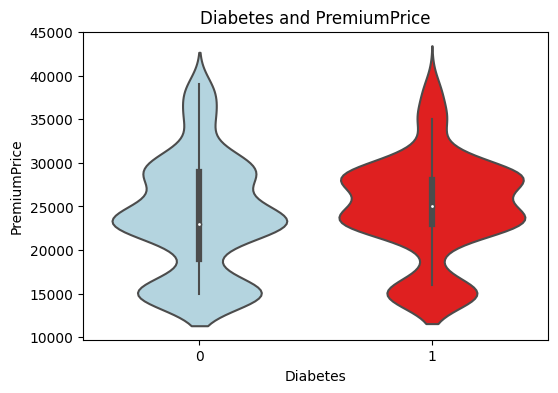

In [37]:
df['Diabetes'] = df['Diabetes'].astype(str)

plt.figure(figsize=(6, 4))

sns.violinplot(x="Diabetes", y="PremiumPrice", data=df, palette = {'1': 'red', '0': 'lightblue'}, alpha=0.7)
#Red are smokers and smoking is not good

plt.title('Diabetes and PremiumPrice')
plt.xlabel('Diabetes')
plt.ylabel('PremiumPrice')
plt.savefig("Diabetes_PremiumPrice.jpg", dpi=300)
plt.show()

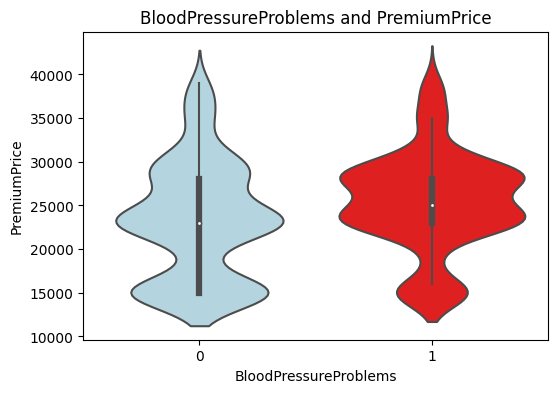

In [38]:
df['BloodPressureProblems'] = df['BloodPressureProblems'].astype(str)

plt.figure(figsize=(6, 4))

sns.violinplot(x="BloodPressureProblems", y="PremiumPrice", data=df, palette = {'1': 'red', '0': 'lightblue'}, alpha=0.7)

plt.title('BloodPressureProblems and PremiumPrice')
plt.xlabel('BloodPressureProblems')
plt.ylabel('PremiumPrice')
plt.savefig("BloodPressureProblems_PremiumPrice.jpg", dpi=300)
plt.show()

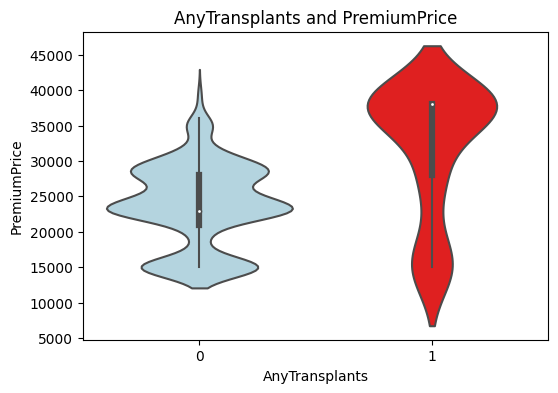

In [39]:
df['AnyTransplants'] = df['AnyTransplants'].astype(str)

plt.figure(figsize=(6, 4))

sns.violinplot(x="AnyTransplants", y="PremiumPrice", data=df, palette = {'1': 'red', '0': 'lightblue'}, alpha=0.7)

plt.title('AnyTransplants and PremiumPrice')
plt.xlabel('AnyTransplants')
plt.ylabel('PremiumPrice')
plt.savefig("AnyTransplants_PremiumPrice.jpg", dpi=300)
plt.show()

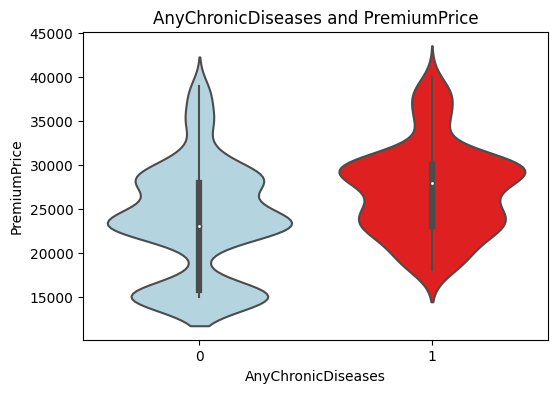

In [40]:
df['AnyChronicDiseases'] = df['AnyChronicDiseases'].astype(str)

plt.figure(figsize=(6, 4))

sns.violinplot(x="AnyChronicDiseases", y="PremiumPrice", data=df, palette = {'1': 'red', '0': 'lightblue'}, alpha=0.7)

plt.title('AnyChronicDiseases and PremiumPrice')
plt.xlabel('AnyChronicDiseases')
plt.ylabel('PremiumPrice')
plt.savefig("AnyChronicDiseases_PremiumPrice.jpg", dpi=300)
plt.show()

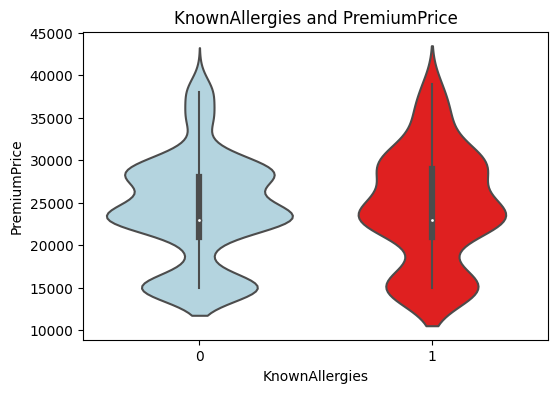

In [41]:
df['KnownAllergies'] = df['KnownAllergies'].astype(str)

plt.figure(figsize=(6, 4))

sns.violinplot(x="KnownAllergies", y="PremiumPrice", data=df, palette = {'1': 'red', '0': 'lightblue'}, alpha=0.7)

plt.title('KnownAllergies and PremiumPrice')
plt.xlabel('KnownAllergies')
plt.ylabel('PremiumPrice')
plt.savefig("KnownAllergies_PremiumPrice.jpg", dpi=300)
plt.show()

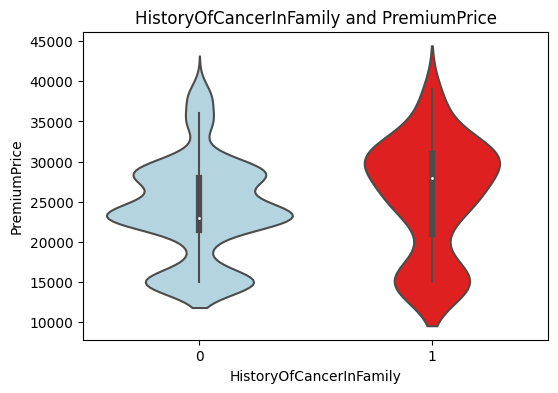

In [42]:
df['HistoryOfCancerInFamily'] = df['HistoryOfCancerInFamily'].astype(str)

plt.figure(figsize=(6, 4))

sns.violinplot(x="HistoryOfCancerInFamily", y="PremiumPrice", data=df, palette = {'1': 'red', '0': 'lightblue'}, alpha=0.7)

plt.title('HistoryOfCancerInFamily and PremiumPrice')
plt.xlabel('HistoryOfCancerInFamily')
plt.ylabel('PremiumPrice')
plt.savefig("HistoryOfCancerInFamily_PremiumPrice.jpg", dpi=300)
plt.show()

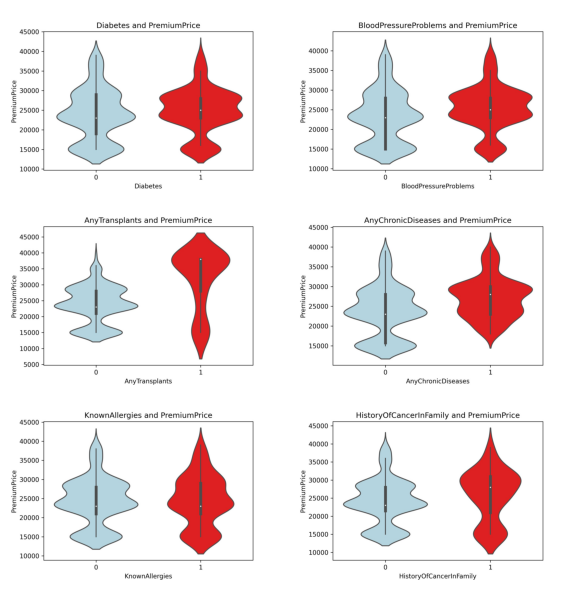

In [43]:
import cv2

image_path = '/kaggle/working/'
image_files = ['Diabetes_PremiumPrice.jpg', 'BloodPressureProblems_PremiumPrice.jpg', 'AnyTransplants_PremiumPrice.jpg', 'AnyChronicDiseases_PremiumPrice.jpg', 'KnownAllergies_PremiumPrice.jpg', 'HistoryOfCancerInFamily_PremiumPrice.jpg']
image_files = [image_path + img for img in image_files]

images = [cv2.cvtColor(cv2.imread(img), cv2.COLOR_BGR2RGB) for img in image_files]

fig, axes = plt.subplots(3, 2, figsize=(6, 6))
axes = axes.ravel()

for i, img in enumerate(images):
    axes[i].imshow(img)
    axes[i].axis('off')

plt.tight_layout()
plt.savefig("/kaggle/working/merged_6cat.jpg", dpi=300)
plt.show()
plt.close()


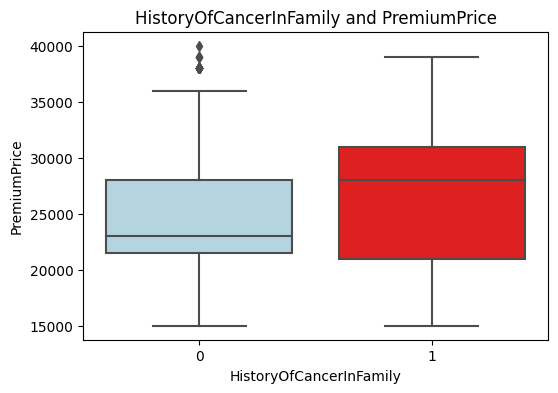

In [44]:
df['HistoryOfCancerInFamily'] = df['HistoryOfCancerInFamily'].astype(str)

plt.figure(figsize=(6, 4))

sns.boxplot(x="HistoryOfCancerInFamily", y="PremiumPrice", data=df, palette={'1': 'red', '0': 'lightblue'})

plt.title('HistoryOfCancerInFamily and PremiumPrice')
plt.xlabel('HistoryOfCancerInFamily')
plt.ylabel('PremiumPrice')
plt.savefig("HistoryOfCancerInFamily_PremiumPrice_box.jpg", dpi=300)
plt.show()


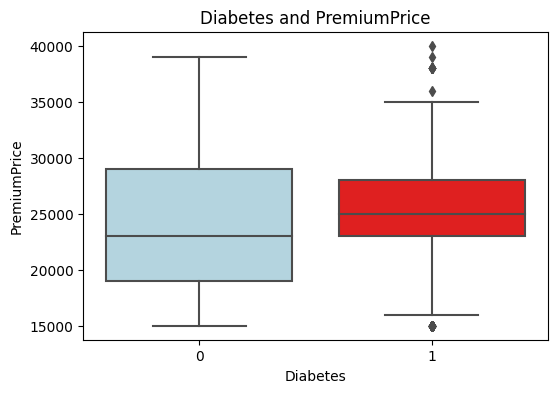

In [45]:

df['Diabetes'] = df['Diabetes'].astype(str)

plt.figure(figsize=(6, 4))

sns.boxplot(x="Diabetes", y="PremiumPrice", data=df, palette={'1': 'red', '0': 'lightblue'})

plt.title('Diabetes and PremiumPrice')
plt.xlabel('Diabetes')
plt.ylabel('PremiumPrice')
plt.savefig("Diabetes_PremiumPrice_box.jpg", dpi=300)
plt.show()


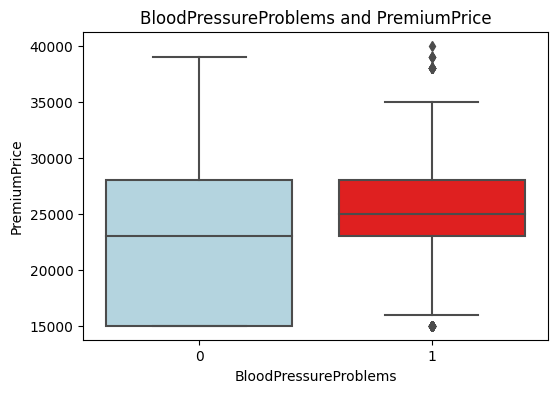

In [46]:

df['BloodPressureProblems'] = df['BloodPressureProblems'].astype(str)

plt.figure(figsize=(6, 4))

sns.boxplot(x="BloodPressureProblems", y="PremiumPrice", data=df, palette={'1': 'red', '0': 'lightblue'})

plt.title('BloodPressureProblems and PremiumPrice')
plt.xlabel('BloodPressureProblems')
plt.ylabel('PremiumPrice')
plt.savefig("BloodPressureProblems_PremiumPrice_box.jpg", dpi=300)
plt.show()


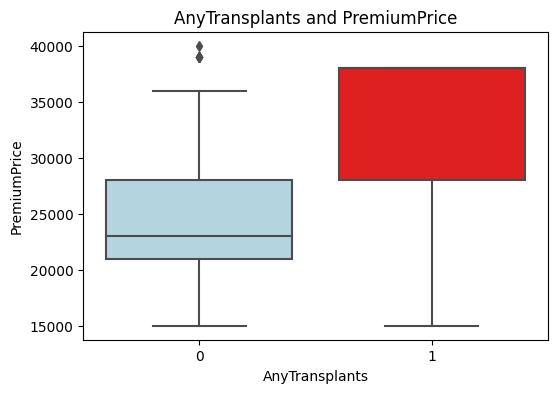

In [47]:

df['AnyTransplants'] = df['AnyTransplants'].astype(str)

plt.figure(figsize=(6, 4))

sns.boxplot(x="AnyTransplants", y="PremiumPrice", data=df, palette={'1': 'red', '0': 'lightblue'})

plt.title('AnyTransplants and PremiumPrice')
plt.xlabel('AnyTransplants')
plt.ylabel('PremiumPrice')
plt.savefig("AnyTransplants_PremiumPrice_box.jpg", dpi=300)
plt.show()


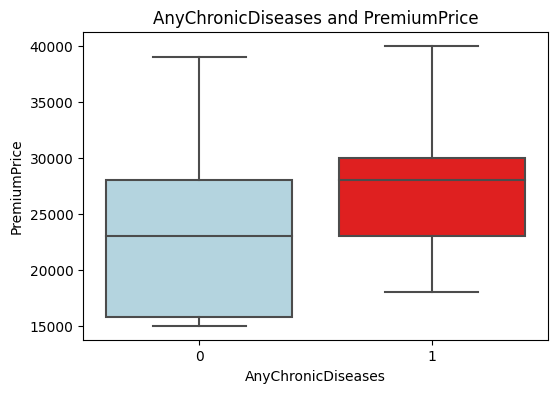

In [48]:

df['AnyChronicDiseases'] = df['AnyChronicDiseases'].astype(str)

plt.figure(figsize=(6, 4))

sns.boxplot(x="AnyChronicDiseases", y="PremiumPrice", data=df, palette={'1': 'red', '0': 'lightblue'})

plt.title('AnyChronicDiseases and PremiumPrice')
plt.xlabel('AnyChronicDiseases')
plt.ylabel('PremiumPrice')
plt.savefig("AnyChronicDiseases_PremiumPrice_box.jpg", dpi=300)
plt.show()


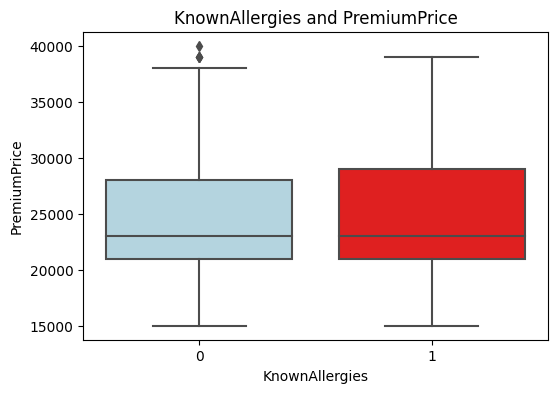

In [49]:

df['KnownAllergies'] = df['KnownAllergies'].astype(str)

plt.figure(figsize=(6, 4))

sns.boxplot(x="KnownAllergies", y="PremiumPrice", data=df, palette={'1': 'red', '0': 'lightblue'})

plt.title('KnownAllergies and PremiumPrice')
plt.xlabel('KnownAllergies')
plt.ylabel('PremiumPrice')
plt.savefig("KnownAllergies_PremiumPrice_box.jpg", dpi=300)
plt.show()


In [50]:
image_path = '/kaggle/working/'
image_files = [
    'Diabetes_PremiumPrice_box.jpg',
    'AnyChronicDiseases_PremiumPrice_box.jpg',
    'BloodPressureProblems_PremiumPrice_box.jpg',
    'HistoryOfCancerInFamily_PremiumPrice_box.jpg',
    'KnownAllergies_PremiumPrice_box.jpg',
    'AnyTransplants_PremiumPrice_box.jpg'
]

image_files = [image_path + img for img in image_files]
images = [cv2.cvtColor(cv2.imread(img), cv2.COLOR_BGR2RGB) for img in image_files]

chronic_disease_index = 1
transplant_index = 5
cancer_history_index = 3

remaining_indices = [0, 2, 4]

fig1, axes1 = plt.subplots(3, 1, figsize=(10, 15))
for i, idx in enumerate([cancer_history_index, transplant_index, chronic_disease_index]):
    axes1[i].imshow(images[idx])
    axes1[i].axis('off')
plt.tight_layout()
plt.savefig("/kaggle/working/cancer_transplant_chronic.jpg", dpi=300)
plt.close()

fig2, axes2 = plt.subplots(3, 1, figsize=(10, 15))
for i, idx in enumerate(remaining_indices):
    axes2[i].imshow(images[idx])
    axes2[i].axis('off')
plt.tight_layout()
plt.savefig("/kaggle/working/remaining_images.jpg", dpi=300)
plt.close()


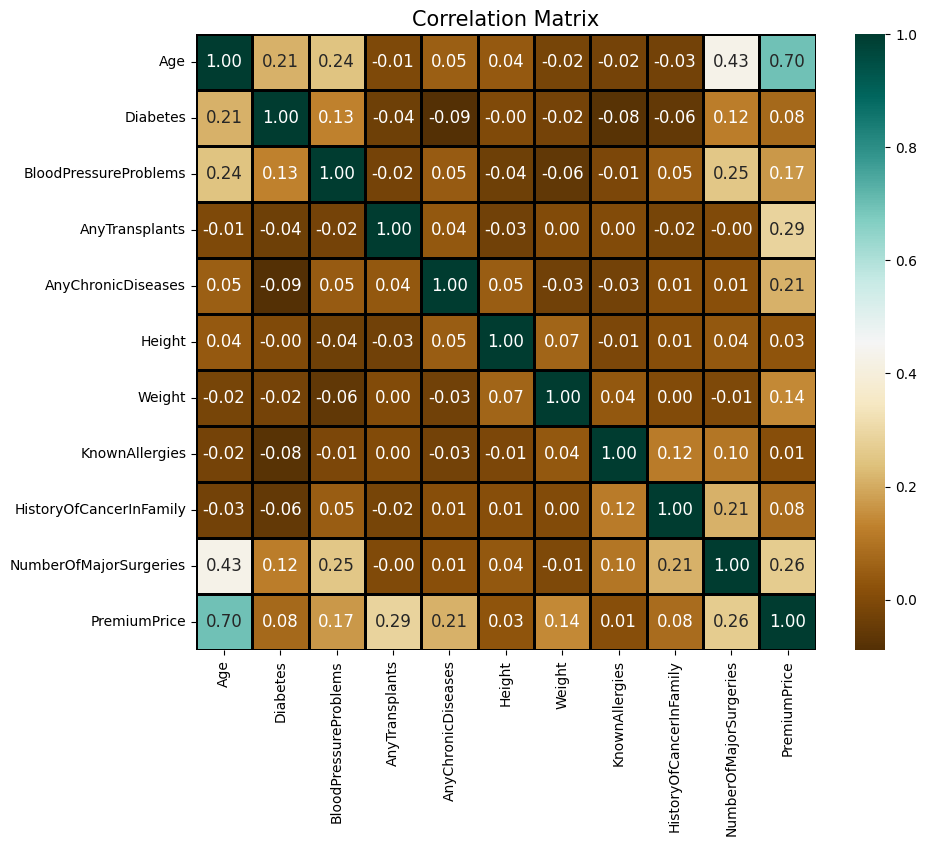

In [51]:
corr_matrix= df.corr();
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='BrBG',fmt='0.2f',  linewidths=2, linecolor='k',annot=True, annot_kws={"size": 12})
plt.title('Correlation Matrix', fontsize=15)
plt.savefig("cormedical.jpg", dpi=300)
plt.show()


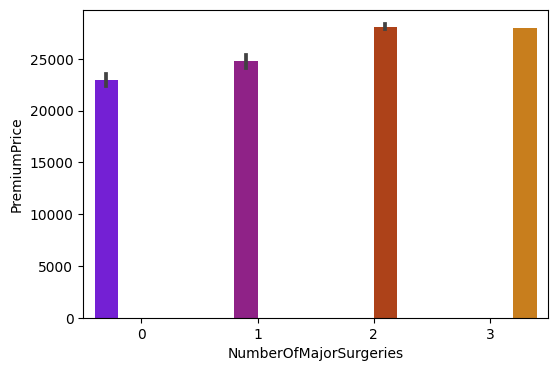

In [52]:
plt.figure(figsize=(6, 4))
ax = sns.barplot(x=df['NumberOfMajorSurgeries'], y=df['PremiumPrice'], hue=df['NumberOfMajorSurgeries'], palette='gnuplot')
plt.xticks(rotation=0)

ax.legend_.remove()

plt.savefig("NumberOfMajorSurgeries.jpg", dpi=300)

plt.show()

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


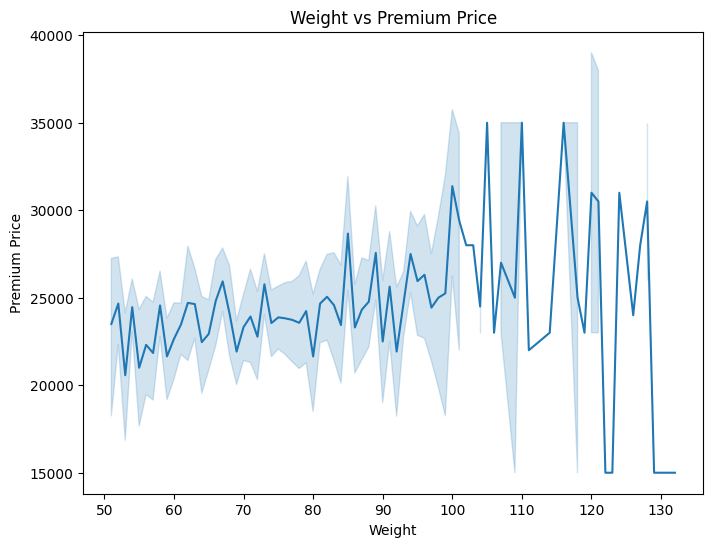

In [53]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

plt.figure(figsize=(8, 6))

sns.lineplot(data=df, x='Weight', y='PremiumPrice')

plt.xlabel('Weight')
plt.ylabel('Premium Price')
plt.title('Weight vs Premium Price')
plt.savefig("Weight_vs_PremiumPrice.jpg", dpi=300)

plt.show()

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


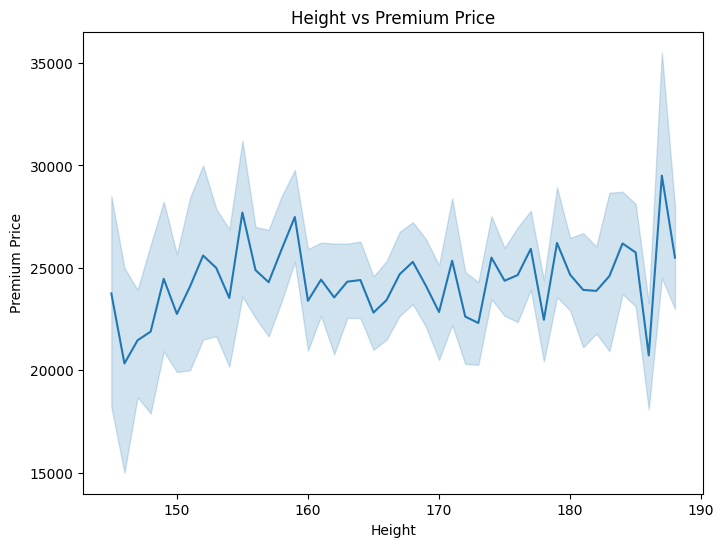

In [54]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

plt.figure(figsize=(8, 6))

# Create line plot
sns.lineplot(data=df, x='Height', y='PremiumPrice')

plt.xlabel('Height')
plt.ylabel('Premium Price')
plt.title('Height vs Premium Price')
plt.savefig("Height_vs_PremiumPrice.jpg", dpi=300)

plt.show()


use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


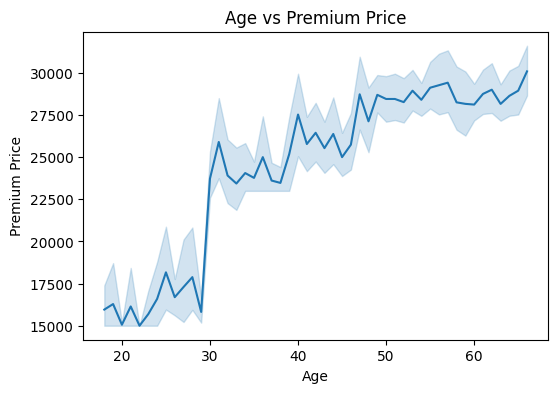

In [55]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

plt.figure(figsize=(6, 4))

# Create line plot
sns.lineplot(data=df, x='Age', y='PremiumPrice')

plt.xlabel('Age')
plt.ylabel('Premium Price')
plt.title('Age vs Premium Price')
plt.savefig("Age_vs_PremiumPrice.jpg", dpi=300)

plt.show()

In [56]:
# Training

X=df.drop(columns='PremiumPrice')
y=df['PremiumPrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [57]:
print(f'Train: {X_train.shape}\nTest: {X_test.shape}')

Train: (690, 10)
Test: (296, 10)


The training accuracy of the Histogram Gradient Boosting Model Train is 91.06
The testing accuracy of the Histogram Gradient Boosting Model Test is 85.28
The MAE of the Histogram Gradient Boosting Model Test is 1482.05
The MSE of the Histogram Gradient Boosting Model Test is 6454819.22
The RMSE of the Histogram Gradient Boosting Model Test is 2540.63
The training accuracy of the Gradient Boosting Model Train is 87.68
The testing accuracy of the Gradient Boosting Model Test is 83.84
The MAE of the Gradient Boosting Model Test is 1573.55
The MSE of the Gradient Boosting Model Test is 7084716.90
The RMSE of the Gradient Boosting Model Test is 2661.71
The training accuracy of the Random Forest Model Train is 96.48
The testing accuracy of the Random Forest Model Test is 81.65
The MAE of the Random Forest Model Test is 1210.14
The MSE of the Random Forest Model Test is 8045175.00
The RMSE of the Random Forest Model Test is 2836.40


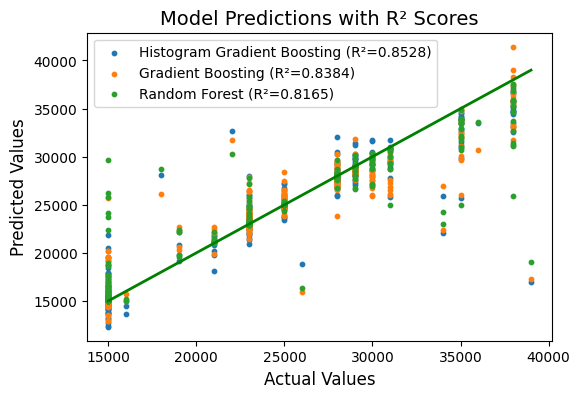

In [58]:
models = [
    ('Histogram Gradient Boosting', HistGradientBoostingRegressor(random_state=42)),
    ('Gradient Boosting', GradientBoostingRegressor(random_state=42)),
    ('Random Forest', RandomForestRegressor(random_state=42))
]

results = []

plt.figure(figsize=(6, 4))

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = model.score(X_test, y_test)
    mae=mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    results.append((name, accuracy, mse, r2))
    train_acc = model.score(X_train, y_train) * 100
    test_acc = accuracy * 100
    print(f'The training accuracy of the {name} Model Train is {train_acc:.2f}')
    print(f'The testing accuracy of the {name} Model Test is {test_acc:.2f}')
    print(f'The MAE of the {name} Model Test is {mae:.2f}')
    print(f'The MSE of the {name} Model Test is {mse:.2f}')
    print(f'The RMSE of the {name} Model Test is {rmse:.2f}')

    plt.scatter(y_test, y_pred, s=10, label=f'{name} (R²={r2:.4f})')

# Plot settings
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='green', linewidth=2)
plt.title('Model Predictions with R² Scores', fontsize=14)
plt.legend(loc='best')

plt.savefig("r2score.jpg", dpi=300)
plt.show()
plt.close()


In [59]:
model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)
mae=mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
results.append((name, accuracy, mse, r2))
train_acc = model.score(X_train, y_train) * 100
test_acc = accuracy * 100

matplotlib.use('Agg')

shap.initjs()
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

print(X_test.shape)
print('Expected Value: ', explainer.expected_value)

X_test = pd.DataFrame(X_test, columns=['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants', 'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies', 'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries'])

plt.clf()
plt.figure(figsize=(15, 6))
shap.summary_plot(shap_values, X_test, plot_type="bar", color='#1a75ff')

fig = plt.gcf()
plt.draw()
image = np.array(fig.canvas.renderer.buffer_rgba())

cv2.imwrite('shap_summary_plot.jpg', cv2.cvtColor(image, cv2.COLOR_RGBA2BGR))

plt.close(fig)


(296, 10)
Expected Value:  [24172.46376812]


In [60]:
colors = ["#9bb7d4", "#0f4c81"]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
plt.figure(figsize=(15, 6))
shap.summary_plot(shap_values, X_test, cmap=cmap, alpha=0.4)

fig = plt.gcf()
plt.draw()
image = np.array(fig.canvas.renderer.buffer_rgba())

cv2.imwrite('shap_summary.jpg', cv2.cvtColor(image, cv2.COLOR_RGBA2BGR))

plt.close(fig)
